# You can read the curves with this

In [4]:
from read_save import read_data
import os
info,params, bands = read_data("../light_curve_rubin_test/"+os.listdir("../light_curve_rubin_test/")[0])




# If you want to plot with pyLIMA

check_event  : Everything looks fine...
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 8 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 8 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/astropy/utils/iers/iers.py:436: IERSDegradedAccuracyWarning: (some) times are outside of range covered by IERS table, accuracy is degraded.
  warn(msg, IERSDegradedAccuracyWarning)
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 8 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/

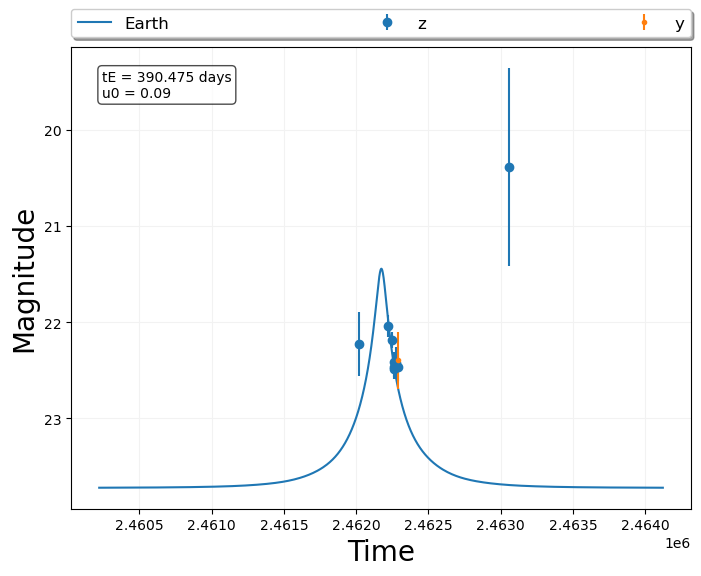

In [22]:
from simulator import model_rubin
from read_save import save_sim, read_data
from pyLIMA.outputs import pyLIMA_plots
import numpy as np
import matplotlib.pyplot as plt
info_dataset, pyLIMA_parameters, bands = read_data('/home/anibal/light_curve_rubin_test/Event_0.h5')
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16,
    'i':27.85, 'z':27.46, 'y':26.68}

ulens_params = []
PAR = ['t0','u0','tE','piEN','piEE']

for b in (PAR):
    ulens_params.append(pyLIMA_parameters[b])
flux_params = []

# Here we change the zero point to the pyLIMA convention in order to make the alignment
for b in bands:
    if not len(bands[b])==0:
        zp_Rubin_to_pyLIMA = (10**((-27.4+ZP[b])/2.5))
        # if not b=='W149':
        flux_params.append(pyLIMA_parameters['fsource_'+b]/zp_Rubin_to_pyLIMA)
        flux_params.append(pyLIMA_parameters['ftotal_'+b]/zp_Rubin_to_pyLIMA)
            
true_params = ulens_params+flux_params

model_ulens = 'PSPL'

Source = 0
event_params = pyLIMA_parameters
# event_params['te']=event_params['tE']
# event_params['s']=event_params['separation']
# event_params['q']=event_params['mass_ratio']

f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'y'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

model_true = model_rubin(Source,True,event_params,model_ulens,info_dataset[1], lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)

if len(true_params) != len(model_true.model_dictionnary):
    telescopes_fluxes = model_true.find_telescopes_fluxes(true_params)
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes]#._fields]
    model_parameters3 = np.r_[true_params, telescopes_fluxes]
else:
    model_parameters3 = true_params

fig, axes = plt.subplots(1, 1,figsize=(8,6))

axes.set_ylabel("Magnitude",fontsize=20)
axes.set_xlabel("Time",fontsize=20)
axes.grid(True, color='0.95')
axes.invert_yaxis()

pyLIMA_plots.plot_photometric_models(axes, model_true, true_params, plot_unit='Mag')
pyLIMA_plots.plot_aligned_data(axes, model_true, true_params, plot_unit='Mag')
colors = ['darkslategray', 'gray', 'lightgray']
plt.annotate(
    "tE = " + str(round(pyLIMA_parameters['tE'],3)) + " days\nu0 = " + str(round(pyLIMA_parameters['u0'],3)),
    xy=(0.05, 0.95),              # position of the annotation in axes fraction
    xycoords="axes fraction",     # coordinate system (relative to axes)
    fontsize=10,
    ha="left", va="top",          # text alignment
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", alpha=0.7)  # optional box
)

axes.legend(shadow=True, fontsize='large',
                          bbox_to_anchor=(0, 1.02, 1, 0.2),
                          loc="lower left",
                          mode="expand", borderaxespad=0, ncol=3)
plt.show()